In [1]:
#Install statsforecast
!pip install statsforecast
#Install mlforecast. 
#This will also install collected packages: window-ops, utilsforecast, mlforecast
!pip install mlforecast
#Install pmdarima
!pip install pmdarima

In [1]:
#Import Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from pmdarima import auto_arima
from statsforecast.models import AutoARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import itertools

C:\Users\edmun\anaconda3\Lib\site-packages\statsforecast\core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [17]:
######Importing data
import pandas as pd
df= pd.read_csv(r"C:\Users\edmun\Desktop\UTRGV Thesis\TS Manuscript Prof- Copy\Data and Codes\USAML.csv")
df.head()

,Month,FluAcases
0,1/1/2009,3766
1,2/1/2009,8102
2,3/1/2009,4373
3,4/1/2009,4094
4,5/1/2009,15120


In [19]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month').resample('MS').mean()
df = df.interpolate() #to interpolate and fill missing values
df.reset_index(inplace=True)
print(df.head())

       Month  FluAcases
0 2009-01-01     3766.0
1 2009-02-01     8102.0
2 2009-03-01     4373.0
3 2009-04-01     4094.0
4 2009-05-01    15120.0


In [21]:
# Calculate descriptive statistics for the numeric columns
descriptive_stats = round(df.describe(),2)
descriptive_stats

,Month,FluAcases
count,180,180.00
mean,2016-06-16 01:36:00,10286.19
min,2009-01-01 00:00:00,12.00
25%,2012-09-23 12:00:00,343.50
50%,2016-06-16 00:00:00,1543.50
75%,2020-03-08 18:00:00,10800.75
max,2023-12-01 00:00:00,151234.00
std,NaN,21309.48


C:\Users\edmun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\edmun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


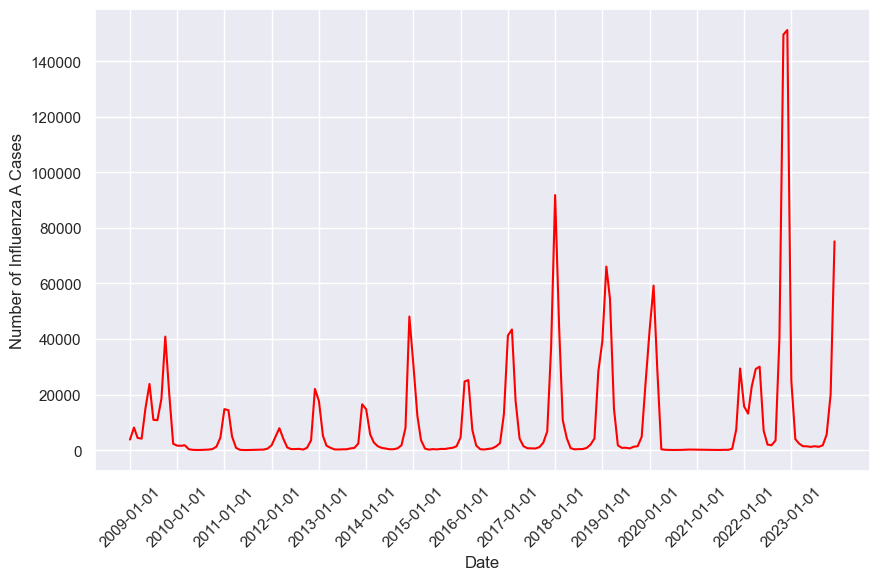

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Month", y='FluAcases', data=df, color='red')
#plt.title('Monthly Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Influenza A Cases')
# Set the x-axis major ticks to show all the years
plt.xticks(pd.date_range(start=df['Month'].min(), end=df['Month'].max(), freq='YS'), rotation=45)
plt.show()

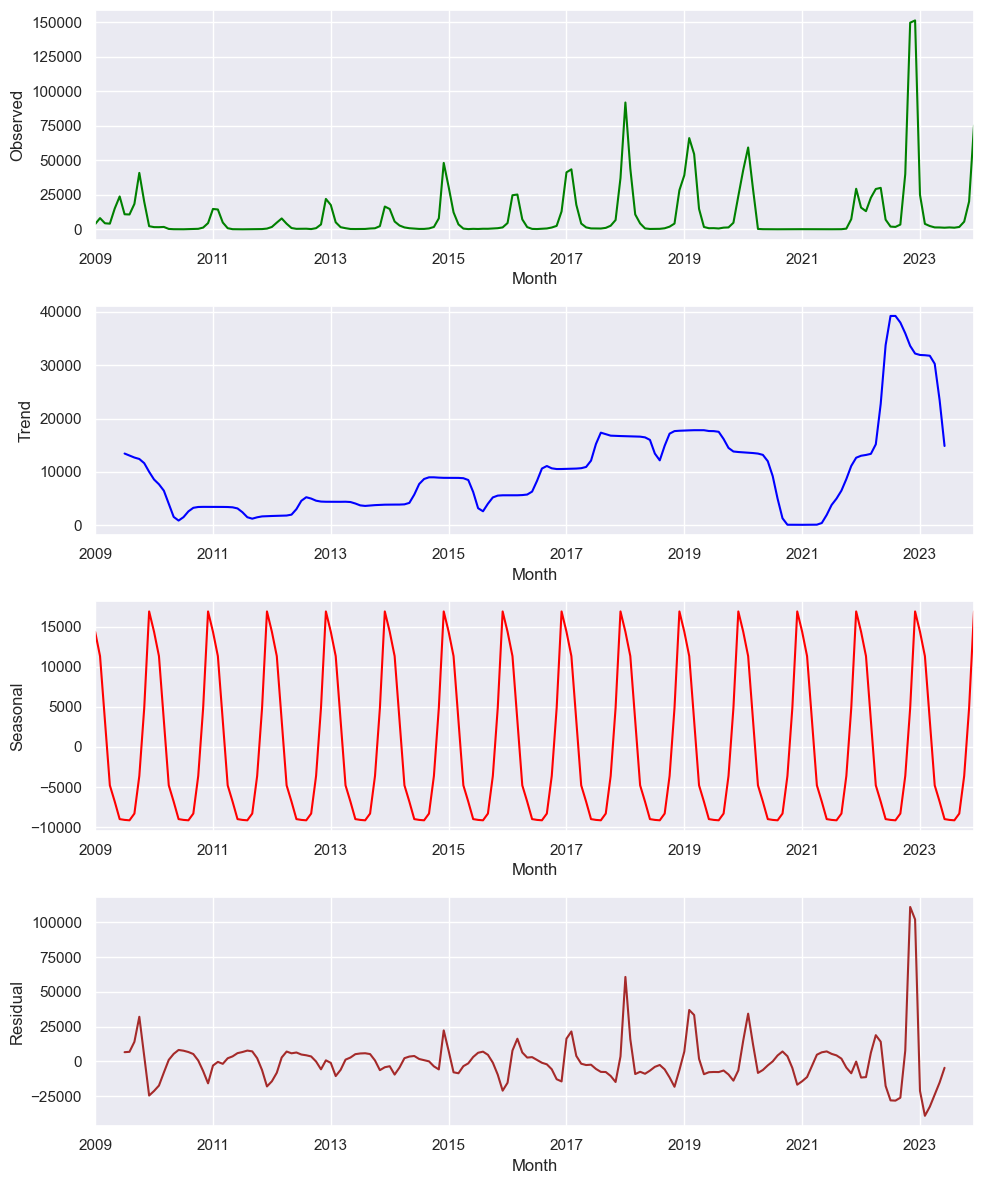

In [25]:
###Run this code separately as this distorts with the other codes.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the index is a DatetimeIndex
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df['FluAcases'], model='additive', period=12)

# Plot the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

result.observed.plot(ax=ax1, color="green")
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='blue')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='red')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='brown')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()